In [296]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn import metrics                   # FOR MATHS
from sklearn.model_selection import train_test_split   # FOR TESTING AND TRAINING DATA
from sklearn.linear_model import LinearRegression    # FOR LINEAR REGRESSION

## IMPORTING DATA 

In [297]:
df=pd.read_csv('/Users/irdam/Downloads/Stock_Price_set.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [298]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## DESCRIBING DATA 

In [299]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [300]:
print("Dataframe Shape: ", df. shape)

Dataframe Shape:  (1009, 7)


## CHECKING FOR MISSING VALUES 

In [301]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [302]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


## PLOTTING OPEN AND ADJ CLOSE VALUE

<AxesSubplot:>

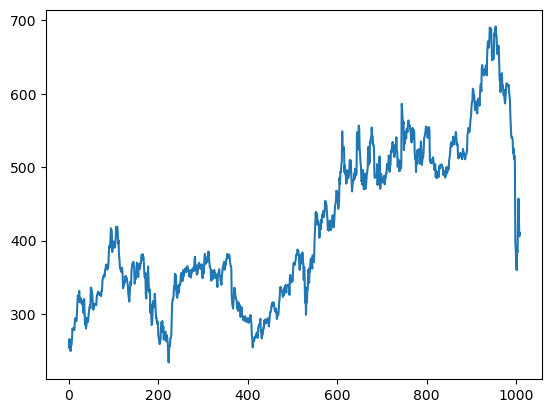

In [303]:
df['Adj Close'].plot()

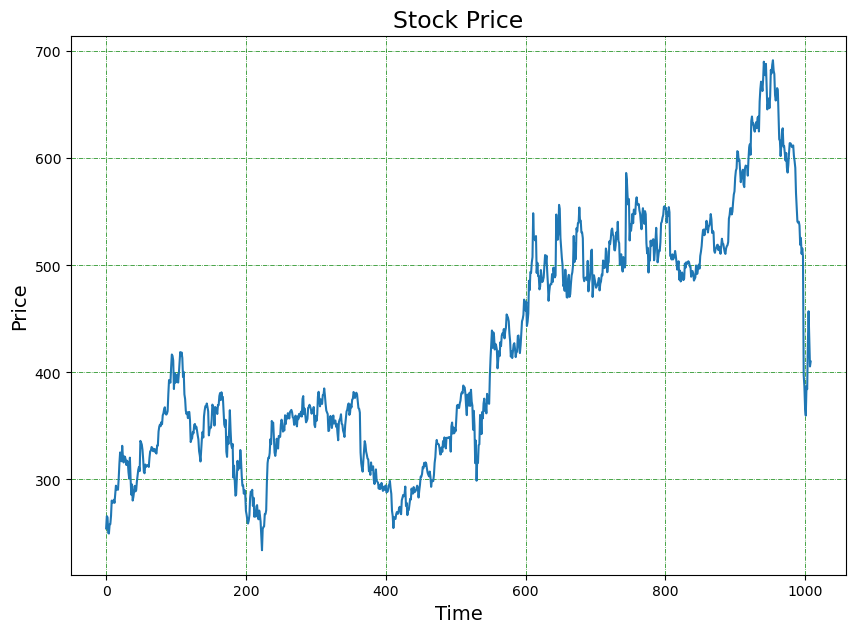

In [304]:
df['Close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='g', linestyle='-.', linewidth=0.5)
plt.show()

# USING LINEAR REGRESSION

## TRAIN AND TEST DATA 

In [305]:
# Import package for splitting data set
from sklearn.model_selection import train_test_split

In [306]:
# Split data into train and test set: 80% / 20%
train, test = train_test_split(df, test_size=0.20)

## CREATING TRAIN MODEL 

In [307]:

# Import package for linear model
from sklearn.linear_model import LinearRegression

In [308]:
# Reshape index column to 2D array for .fit() method
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

In [309]:
# Create LinearRegression Object
model = LinearRegression()
# Fit linear model using the train data set
model.fit(X_train, y_train)

LinearRegression()

In [310]:
# The coefficient
print('Slope: ', model.coef_)
# The Intercept
print('Intercept: ', model.intercept_)

Slope:  [0.31348814]
Intercept:  260.106424865886


## MODEL EVALUATION 

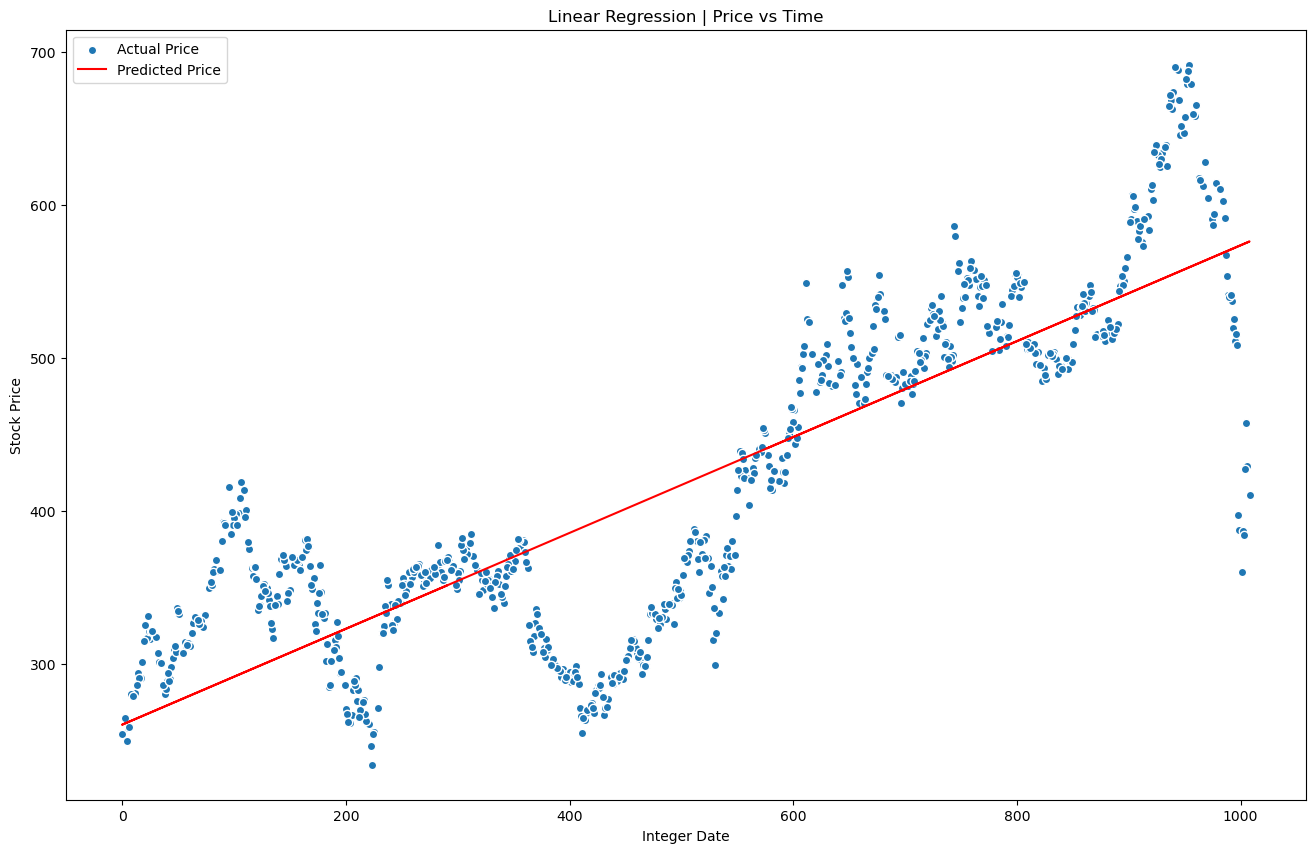

In [311]:
# Train set graph
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## PREDICTING OUR MODEL

In [312]:
# Create test arrays
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

In [313]:
# Generate array with predicted values
y_pred = model.predict(X_test)


In [314]:
dff=pd.DataFrame({'actual':y_test,'predicted':y_pred})
dff

,actual,predicted
203,258.820007,323.744518
456,312.489990,403.057018
701,479.100006,479.861613
107,415.630005,293.649656
845,491.899994,525.003905
...,...,...
789,502.859985,507.448569
641,492.309998,461.052324
658,483.859985,466.381623
125,343.089996,299.292443


##  EVALUTION

In [322]:
graph=dff.head(20)

<AxesSubplot:>

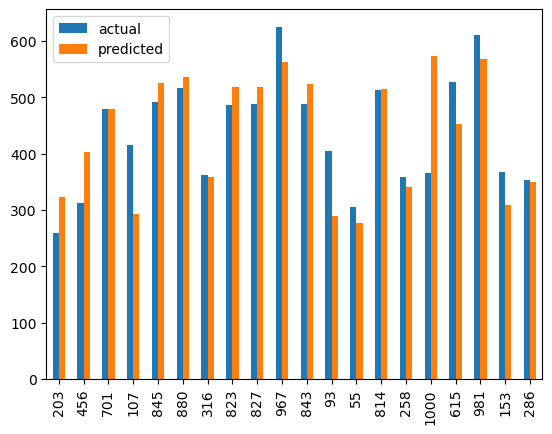

In [323]:
graph.plot(kind='bar')

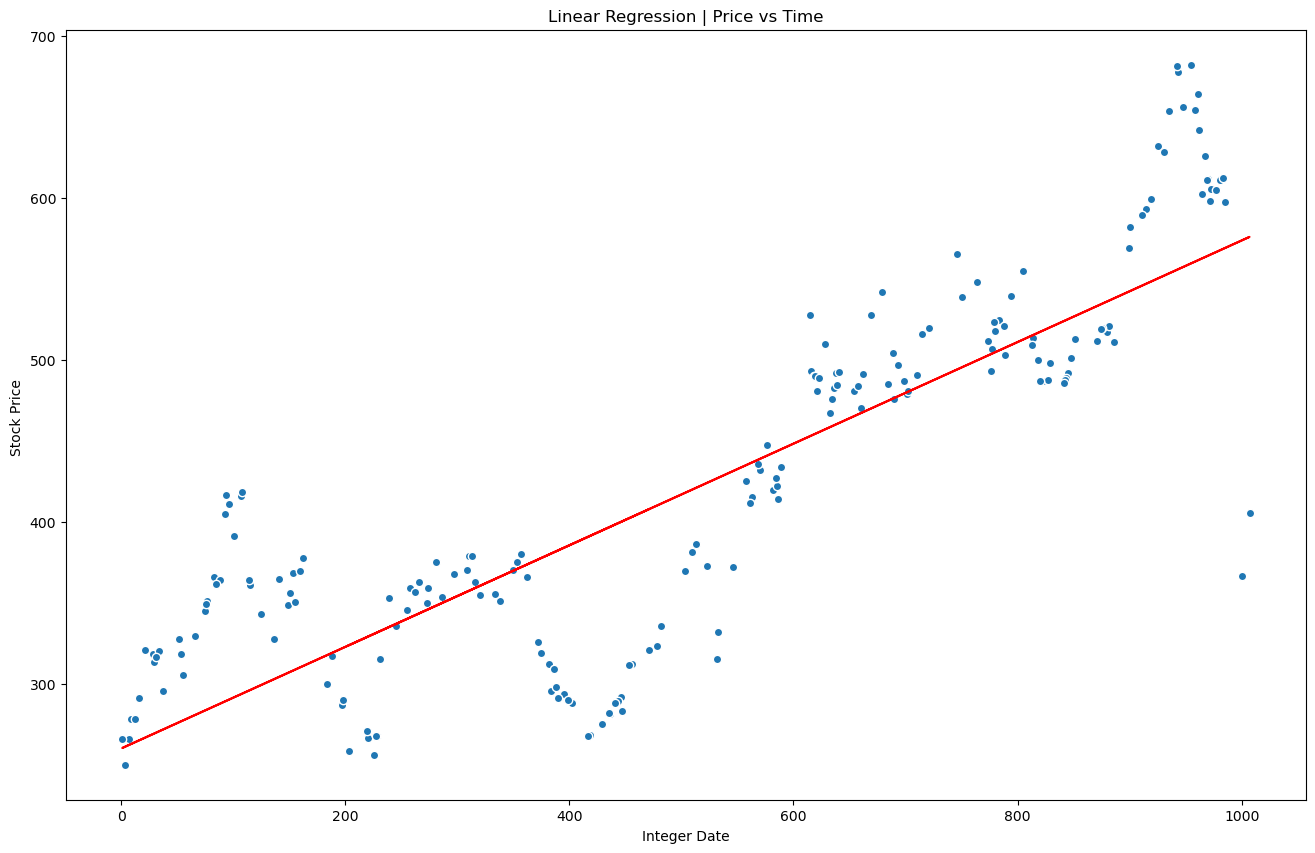

In [317]:
# Plot fitted line, y test
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.plot(X_test, model.predict(X_test), color='r', label='Predicted Price')
plt.scatter(X_test, y_test, edgecolor='w', label='Actual Price')

plt.xlabel('Integer Date')
plt.ylabel('Stock Price ')

plt.show()

In [318]:
# Add new column for predictions to df
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))

In [319]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,260.106425
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,260.419913
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,260.733401
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,261.046889
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,261.360377


## FINDING ERRORS 

In [320]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [321]:
# Calculate and print values of MAE, MSE, RMSE
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 46.417567106608864
Mean Squared Error: 3555.665960353219
Root Mean Squared Error: 59.629405165180195
